<h1>Chapter 01. The Python Data Model</h1>

<h2>A Pythonic Card Deck</h2>

A deck as sequence of playing cards

In [1]:
from collections import namedtuple


Card = namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [
        str(n) for n in range(2, 11)
    ] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [
            Card(rank, suit) for suit in self.suits
            for rank in self.ranks
        ]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

In [2]:
beer_card = Card('7', 'diamonds')
beer_card

Card(rank='7', suit='diamonds')

In [3]:
deck = FrenchDeck()
len(deck)

52

In [4]:
deck[0]

Card(rank='2', suit='spades')

In [5]:
deck[-1]

Card(rank='A', suit='hearts')

In [6]:
from random import choice


choice(deck)

Card(rank='3', suit='hearts')

In [7]:
choice(deck)

Card(rank='6', suit='spades')

In [8]:
choice(deck)

Card(rank='J', suit='spades')

In [9]:
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [10]:
deck[12::13]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

In [11]:
for card in deck:
    print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='3', suit='diamonds')
Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='8', sui

In [12]:
for card in reversed(deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

In [13]:
Card('Q', 'hearts') in deck

True

In [14]:
Card('7', 'beasts').__contains__(deck)  # Card('7', 'beasts') in deck

False

In [15]:
# sort deck
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]

In [16]:
for card in sorted(deck, key=spades_high):
    print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

<h2>Emulating Numeric Types</h2>

A simple two-dimensional vector class

In [17]:
import math


class Vector:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    
    def __bool__(self):
        return bool(abs(self))

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

    def __repr__(self):
        return f"Vector({self.x!r}, {self.y!r})"

In [18]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)
v3 = v1 + v2
v3

Vector(4, 5)

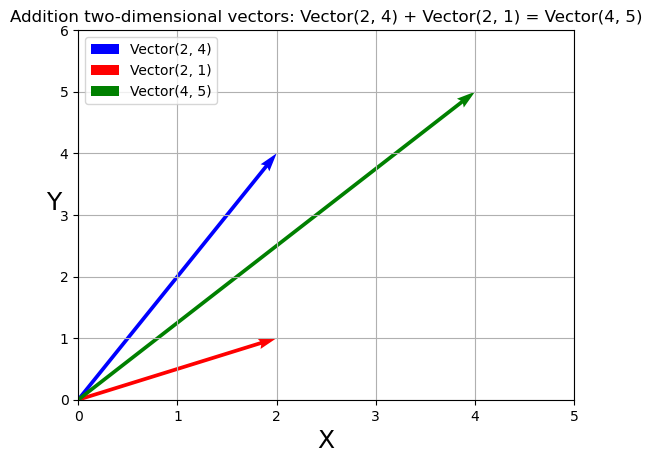

In [19]:
import matplotlib.pyplot as plt


plt.quiver(
    0, 0,                 # start the vector at the origin (0, 0)
    v1.x, v1.y,           # represent the vector's direction and magnitude
    angles='xy',          # define angles in the 'xy' coordinate system
    scale_units='xy',     # use the same unit scale in both x and y directions
    scale=1,              # scale factor for the vector's length
    color='b',            
    label='Vector(2, 4)'  
)
plt.quiver(
    0, 0,
    v2.x, v2.y,
    angles='xy',
    scale_units='xy',
    scale=1,
    color='r',
    label='Vector(2, 1)'
)
plt.quiver(
    0, 0,
    v3.x,
    v3.y,
    angles='xy',
    scale_units='xy',
    scale=1,
    color='g',
    label='Vector(4, 5)'
)

plt.xlim(0, max(v1.x, v2.x, v3.x) + 1)
plt.ylim(0, max(v1.y, v2.y, v3.y) + 1)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', rotation=0, fontsize=18)
plt.legend(loc='upper left')
plt.title('Addition two-dimensional vectors: Vector(2, 4) + Vector(2, 1) = Vector(4, 5)')
plt.grid(True)
plt.show()